# Part 3 Mine + Refine
EDA + Preliminary Analysis

MINE: Prepare, structure, & clean the data
Often, our data will need to be cleaned prior performing our analysis.

Common Tasks at this step include:
- Sampling the data, determine sampling methodology
- Iterating and explore outliers, null values via select
- Reviewing qualitative vs quantitative data
- Formatting and cleaning data in Python (e.g. dates, number signs, formatting)
- Defining how to appropriately address missing values (cleaning)
- Categorization, manipulation, slicing, format, integrate data
- Formatting and combining different data points, separate columns, etc.
- Determining most appropriate aggregations, cleaning methods
- Creating necessary derived columns from the data (new data)


REFINE: Exploratory Data Analysis & Iteration

Such descriptive statistics allow us to:
- Identify trends and outliers
- Decide how to deal with outliers - excluding, filtering, and communication
- Apply descriptive and inferential statistics
- Determine initial visualization techniques
- Document and capture knowledge
- Choose visualization techniques for different data types
- Transform data

### notes
summary statistics 

At this point, you'll be conducting EDA - or exploratory data analysis. For example, you may perform some basic summary statistics and check the Mean (STD) or specific frequency counts of your data. Example:

Variable |  Frequency counts (%)
---| ---
Number of Deliveries | 50.0 (10)
NYC | 50 (10%)
LA 9 | 100 (20%)
Portland | 100 (20%)
Seattle 8| 100 (20%)
Other | 150 (30%)

Begin quantitatively describing and visualizing your data. 

Why is it good for modelling- summarize risks and limitations, and describe how your EDA will inform your modeling decisions.




# Text Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Extracting Training data from ABSA xml
- I was able to find labeled training data for a sentiment evaluation of restaurant reviews from meta-share, a language data resource.

http://metashare.ilsp.gr:8080/repository/browse/semeval-2015-absa-restaurant-reviews-train-data/b2ac9c0c198511e4a109842b2b6a04d751e6725f2ab847df88b19ea22cb5cc4a/

In [2]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET

xml_path = './NLP/ABSA15_RestaurantsTrain2/ABSA-15_Restaurants_Train_Final.xml'

def parse_data_2015(xml_path):
    container = []                                              
    reviews = ET.parse(xml_path).getroot()                      
    
    for review in reviews:  
        sentences = review.getchildren()[0].getchildren()       
        for sentence in sentences:                                  
            sentence_text = sentence.getchildren()[0].text          
            
            try:                                                     
                opinions = sentence.getchildren()[1].getchildren()
            
                for opinion in opinions:                                
                    polarity = opinion.attrib["polarity"]
                    target = opinion.attrib["target"]
        
                    row = {"sentence": sentence_text, "sentiment":polarity}   
                    container.append(row)                                                              
                
            except IndexError: 
                row = {"sentence": sentence_text}        
                container.append(row)                                                               
                
    return pd.DataFrame(container)

ABSA_df = parse_data_2015(xml_path)
ABSA_df.head()

/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  if sys.path[0] == '':
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


,sentence,sentiment
0,Judging from previous posts this used to be a ...,negative
1,"We, there were four of us, arrived at noon - t...",negative
2,"They never brought us complimentary noodles, i...",negative
3,The food was lousy - too sweet or too salty an...,negative
4,The food was lousy - too sweet or too salty an...,negative


### Duplicates
- duplicates are removed
- in the dataframe above index 3 and 4 are the same review. 

In [3]:
print "Original:", ABSA_df.shape
dd = ABSA_df.drop_duplicates()
ABSA_dd = dd.reset_index(drop=True)
print "Drop Dupicates:", ABSA_dd.shape

Original: (1849, 2)
Drop Dupicates: (1396, 2)


In [4]:
ABSA_dd.head()

,sentence,sentiment
0,Judging from previous posts this used to be a ...,negative
1,"We, there were four of us, arrived at noon - t...",negative
2,"They never brought us complimentary noodles, i...",negative
3,The food was lousy - too sweet or too salty an...,negative
4,"After all that, they complained to me about th...",negative


### Sentiment Null Values
- null values in the seniment column are unclassified reviews. I want to convert these into the 'neutral' class.  
- At the moment the neutral label applies for mildly positive or negative sentiment, thus it does not indicate objectivity. Adding the unclassified reviews to this class will change the class definition to mildly positive, negative and objective reviews. 
- This increases the size of the neutral class. 

In [5]:
ABSA_dd.sentiment.value_counts()

positive    834
negative    317
neutral      50
Name: sentiment, dtype: int64

In [6]:
ABSA_df.isnull().sum()

sentence       0
sentiment    195
dtype: int64

In [7]:
dd_dn = ABSA_dd.fillna('neutral')
df = dd_dn.reset_index(drop=True)
print "Drop Nulls:", df.shape
print 
print df.isnull().sum()
print
df.sentiment.value_counts()

Drop Nulls: (1396, 2)

sentence     0
sentiment    0
dtype: int64



positive    834
negative    317
neutral     245
Name: sentiment, dtype: int64

# Text Pre-processing
To further organise this process a blogpost from kdnuggets split it into categories of substitution normalization and tokenization.
https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html 

# Preprocessing: Tokenization
Tokenization is the process of converting text into tokens. For example, a document into paragraphs, then sentences and words. In this case we are tokenising into words. Once we have done this it can be easier to do further preprocessing like filtering out unesseary tokens which may cause noise.


In [8]:
df.sentence[17]

'Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, because it was so great!'

In [9]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(df.sentence[17])
print(tokens)

['Went', 'on', 'a', '3', 'day', 'oyster', 'binge', ',', 'with', 'Fish', 'bringing', 'up', 'the', 'closing', ',', 'and', 'I', 'am', 'so', 'glad', 'this', 'was', 'the', 'place', 'it', 'O', 'trip', 'ended', ',', 'because', 'it', 'was', 'so', 'great', '!']


### Stopwords
Stop words are the most commonly occuring words which are not relevant in the context of the data and do not contribute any deeper meaning to the phrase. In this case contain no sentiment. NLTK provide a library used for this.

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print [i for i in tokens if i not in stop_words]

['Went', '3', 'day', 'oyster', 'binge', ',', 'Fish', 'bringing', 'closing', ',', 'I', 'glad', 'place', 'O', 'trip', 'ended', ',', 'great', '!']


# Preprocessing: Normalization


### 1. Casing the Characters 
converting character to the same case so the same words are recognised as the same. In this case we converted to lowercase. 



In [11]:
df.sentence[24]

"I had my eyes on this place, promising myself I will one day 'give it a try.' "

In [12]:
lower_case = df.sentence[24].lower()
lower_case

"i had my eyes on this place, promising myself i will one day 'give it a try.' "

### 1. Negation handling
Apostrophes connecting words are used everywhere, especially in public reviews. To maintain uniform structure throughout the whole text it is recommended to remove them in-place of the actual word. I found a dictionary of the most common apostrophe joined words.

https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view 


In [13]:
# %load ./NLP/appos.py
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [14]:
words = lower_case.split()
reformed = [appos[word] if word in appos else word for word in words]
reformed = " ".join(reformed) 
reformed

"i had my eyes on this place, promising myself i will one day 'give it a try.'"

### Removal of tokens
Stand alone punctuations, special characters and numerical tokens are removed as they do not contribute to sentiment which leaves  only alphabetic characters. This step needs the use of tokenized words as they have been split appropriately for us to remove

In [15]:
tokens

['Went',
 'on',
 'a',
 '3',
 'day',
 'oyster',
 'binge',
 ',',
 'with',
 'Fish',
 'bringing',
 'up',
 'the',
 'closing',
 ',',
 'and',
 'I',
 'am',
 'so',
 'glad',
 'this',
 'was',
 'the',
 'place',
 'it',
 'O',
 'trip',
 'ended',
 ',',
 'because',
 'it',
 'was',
 'so',
 'great',
 '!']

In [16]:
words = [word for word in tokens if word.isalpha()]
words

['Went',
 'on',
 'a',
 'day',
 'oyster',
 'binge',
 'with',
 'Fish',
 'bringing',
 'up',
 'the',
 'closing',
 'and',
 'I',
 'am',
 'so',
 'glad',
 'this',
 'was',
 'the',
 'place',
 'it',
 'O',
 'trip',
 'ended',
 'because',
 'it',
 'was',
 'so',
 'great']

### Lemmatization 
This process finds the base or dictionary form of the word known as the lemma. This is done through the use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations). This normalization allows words that are similar but with different meanings can be handled in the correct way.


In [17]:
words

['Went',
 'on',
 'a',
 'day',
 'oyster',
 'binge',
 'with',
 'Fish',
 'bringing',
 'up',
 'the',
 'closing',
 'and',
 'I',
 'am',
 'so',
 'glad',
 'this',
 'was',
 'the',
 'place',
 'it',
 'O',
 'trip',
 'ended',
 'because',
 'it',
 'was',
 'so',
 'great']

In [18]:
from gensim.utils import lemmatize
lemm = [lemmatize(word) for word in words]
lemm

[['go/VB'],
 [],
 [],
 ['day/NN'],
 ['oyster/NN'],
 ['binge/NN'],
 [],
 ['fish/NN'],
 ['bring/VB'],
 [],
 [],
 ['close/VB'],
 [],
 [],
 ['be/VB'],
 ['so/RB'],
 ['glad/JJ'],
 [],
 ['be/VB'],
 [],
 ['place/NN'],
 [],
 [],
 ['trip/NN'],
 ['end/VB'],
 [],
 [],
 ['be/VB'],
 ['so/RB'],
 ['great/JJ']]

In [19]:
df.sentence[17]

'Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, because it was so great!'

In [20]:
lemmatize(df.sentence[17])

['go/VB',
 'day/NN',
 'oyster/NN',
 'binge/NN',
 'fish/NN',
 'bring/VB',
 'closing/NN',
 'be/VB',
 'so/RB',
 'glad/JJ',
 'be/VB',
 'place/NN',
 'trip/NN',
 'end/VB',
 'be/VB',
 'so/RB',
 'great/JJ']

In [21]:
df.sentence[24]

"I had my eyes on this place, promising myself I will one day 'give it a try.' "

In [22]:
lemmatize(df.sentence[24])

['have/VB', 'eye/NN', 'place/NN', 'promise/VB', 'day/NN', 'give/VB', 'try/NN']

# Substitution
This involves removing noise from text in its raw format. For example, the text is scrapped from the web it may contain HTML or XML wrappers or markups.


### Decoding

In [23]:
df.sentence[24].decode("utf-8-sig")

u"I had my eyes on this place, promising myself I will one day 'give it a try.' "

# Cleaning Function 
- decoding 
- lowercasing so negation dictionary can apply
- negation dictionary
- Lemmatization from gensim : tokenising, lower_case, removal of special chacacters, stand alone punctuation, stop words and POS tagging. 

In [24]:
import pandas as pd
import numpy as np
from gensim.utils import lemmatize
from tqdm import tqdm_notebook as tqdm
import time
# %load ./NLP/appos.py

In [25]:
def cleaning_function(tips):
    all_ = []
    for tip in tqdm(tips):
        time.sleep(0.0001)
        
#       Decoding function
        decode = tip.decode("utf-8-sig")
    
#       Lowercasing before negation
        lower_case = decode.lower()
    
#       Replace apostrophes with words
        words = lower_case.split()
        split = [appos[word] if word in appos else word for word in words]
        reformed = " ".join(split) 
        
#       Lemmatization
        lemm = lemmatize(lower_case)
        all_.append(lemm)
        
    return all_      

def separate_word_tag(df_lem_test):
    words=[]
    types=[]
    df= pd.DataFrame()
    for row in df_lem_test:
        sent = []
        type_ =[]
        for word in row:
            split = word.split('/')
            sent.append(split[0])
            type_.append(split[1])

        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))


    df['lem_words']= words
    df['lem_tags']= types
    return df


## Preprocessing Training Data

In [26]:
word_tag = cleaning_function(df.sentence)
lemm_df = separate_word_tag(word_tag)
lemm_df.head()

A Jupyter Widget

,lem_words,lem_tags
0,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ
1,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ
2,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN
3,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ
4,complain small tip,VB JJ NN


In [27]:
# concat cleaned text with original
df_training = pd.concat([df, lemm_df], axis=1)
df_training['word_tags'] = word_tag
df_training.head()

,sentence,sentiment,lem_words,lem_tags,word_tags
0,Judging from previous posts this used to be a ...,negative,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ,"[judge/VB, previous/JJ, post/NN, used/VB, be/V..."
1,"We, there were four of us, arrived at noon - t...",negative,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ,"[be/VB, arrive/VB, noon/NN, place/NN, be/VB, e..."
2,"They never brought us complimentary noodles, i...",negative,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN,"[never/RB, bring/VB, complimentary/JJ, noodle/..."
3,The food was lousy - too sweet or too salty an...,negative,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ,"[food/NN, be/VB, lousy/JJ, too/RB, sweet/JJ, t..."
4,"After all that, they complained to me about th...",negative,complain small tip,VB JJ NN,"[complain/VB, small/JJ, tip/NN]"


### Convert sentiment to numerical values

In [28]:
# the classes of the sentiment
print df_training.sentiment.value_counts()

positive    834
negative    317
neutral     245
Name: sentiment, dtype: int64


In [29]:
# converting the polarity to numeric values
df_training['sentiment'] = df_training.sentiment.map(lambda x: int(2) if x =='positive' else int(0) if x =='negative' else int(1) if x == 'neutral' else np.nan)

In [30]:
print df_training['sentiment'].value_counts()
df_training.head()

2    834
0    317
1    245
Name: sentiment, dtype: int64


,sentence,sentiment,lem_words,lem_tags,word_tags
0,Judging from previous posts this used to be a ...,0,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ,"[judge/VB, previous/JJ, post/NN, used/VB, be/V..."
1,"We, there were four of us, arrived at noon - t...",0,be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ,"[be/VB, arrive/VB, noon/NN, place/NN, be/VB, e..."
2,"They never brought us complimentary noodles, i...",0,never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN,"[never/RB, bring/VB, complimentary/JJ, noodle/..."
3,The food was lousy - too sweet or too salty an...,0,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ,"[food/NN, be/VB, lousy/JJ, too/RB, sweet/JJ, t..."
4,"After all that, they complained to me about th...",0,complain small tip,VB JJ NN,"[complain/VB, small/JJ, tip/NN]"


# Check points
#### Null values
- reset index 
- No null values present

#### Empty values
- after cleaning some values may not be presented as null values but just empty spaces.
- It was identified that the empty spaces after cleaning belonged to the reviews with a numeric value, accroym and singlular word.


In [31]:
# reset index just to be safe
df_training = df_training.reset_index(drop=True)
df_training.isnull().sum()

sentence     0
sentiment    0
lem_words    0
lem_tags     0
word_tags    0
dtype: int64

In [32]:
df_training[df_training['lem_words']=='']

,sentence,sentiment,lem_words,lem_tags,word_tags
475,LOL,1,,,[]
648,10,2,,,[]
720,Why?,1,,,[]


In [33]:
# drop these rows
print df_training.shape
df_training = df_training.drop([475, 648, 720])
df_training = df_training.reset_index(drop=True)
print df_training.shape

(1396, 5)
(1393, 5)


# EDA: Visualizations
## Distribution of Sentiment


In [34]:
# the classes of the polarity
print df_training.sentiment.value_counts()

2    833
0    317
1    243
Name: sentiment, dtype: int64


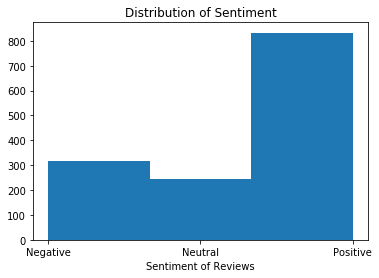

In [35]:
import matplotlib.pyplot as plt
plt.hist(df_training.sentiment, bins = 3, align= 'mid')
plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
plt.xlabel('Sentiment of Reviews')
plt.title('Distribution of Sentiment')
plt.show()

### Train Test Split + Bootstrapping

In [36]:
print df_training.sentiment.value_counts()
print df_training.shape

2    833
0    317
1    243
Name: sentiment, dtype: int64
(1393, 5)


In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_training, test_size=0.3, random_state=1)

t_1 = train[train['sentiment']==1].sample(800,replace=True)
t_2 = train[train['sentiment']==2].sample(800,replace=True)
t_3 = train[train['sentiment']==0].sample(800,replace=True)
training_bs = pd.concat([t_1, t_2, t_3])

print train.shape
print training_bs.shape
print test.shape

# sanity check 
df_training.shape[0] == (train.shape[0] + test.shape[0])

(975, 5)
(2400, 5)
(418, 5)


True

# Baseline Accuracy
The baseline accuracy is the proportion of the majority class. In this case '2' which is positive sentiment and so the baseline accuracy is 0.333556
baseline_accuracy = majority class N / total N

In [38]:
print train['sentiment'].value_counts(normalize=True)
baseline = 0.3

2    0.579487
0    0.234872
1    0.185641
Name: sentiment, dtype: float64


In [39]:
print training_bs['sentiment'].value_counts(normalize=True)
baseline = 0.3

1    0.333333
2    0.333333
0    0.333333
Name: sentiment, dtype: float64


# Save to csv file

In [40]:
# training and testing to csv
training_bs = training_bs.reset_index(drop=True)
training_bs.to_csv('./train_test_data/training_bs.csv', header=True, index=False, encoding='UTF8')
test = test.reset_index(drop=True)
test.to_csv('./train_test_data/testing.csv', header=True, index=False, encoding='UTF8')
training_bs.head()

,sentence,sentiment,lem_words,lem_tags,word_tags
0,"Next time, we wouldn't dare ordering anything ...",1,next time wouldn dare order anything else othe...,JJ NN VB VB VB NN RB JJ JJ NN NN NN,"[next/JJ, time/NN, wouldn/VB, dare/VB, order/V..."
1,What's the difference between the two?,1,difference,NN,[difference/NN]
2,Downtown Dinner 2002 - Prixe fix: Appetizers w...,1,downtown dinner fix appetizer be waiter give p...,JJ NN VB NN VB NN VB JJ NN VB NN NN VB RB,"[downtown/JJ, dinner/NN, fix/VB, appetizer/NN,..."
3,I wasn't thrilled to have to wait on line for ...,1,wasn thrill have wait line minute guess price ...,VB VB VB VB NN NN NN NN VB JJ NN,"[wasn/VB, thrill/VB, have/VB, wait/VB, line/NN..."
4,We were fast to order the appetizer platter si...,1,be fast order appetizer platter be very hungry,VB JJ NN NN JJ VB RB JJ,"[be/VB, fast/JJ, order/NN, appetizer/NN, platt..."


# Word Cloud of Classes

In [41]:
print training_bs.sentiment.value_counts()
train_s0 = training_bs[training_bs.sentiment ==0]
train_s1 = training_bs[training_bs.sentiment ==1]
train_s2 = training_bs[training_bs.sentiment ==2]

1    800
2    800
0    800
Name: sentiment, dtype: int64


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
from PIL import Image

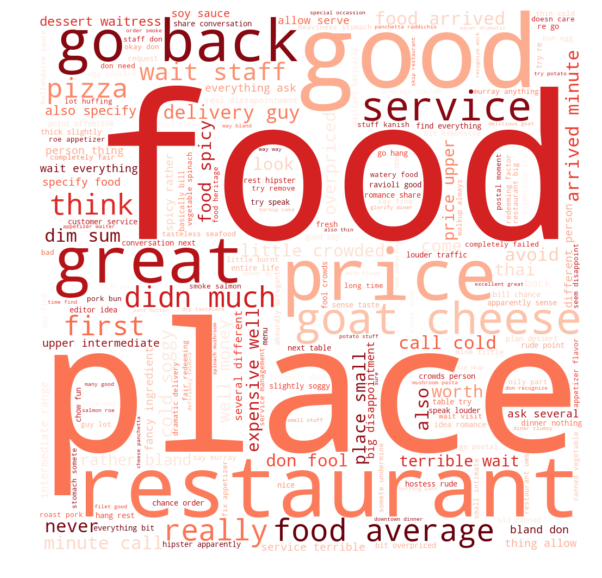

In [50]:
# Polarity == 0 negative
all_text = ' '.join(word for word in train_s0.lem_words)

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

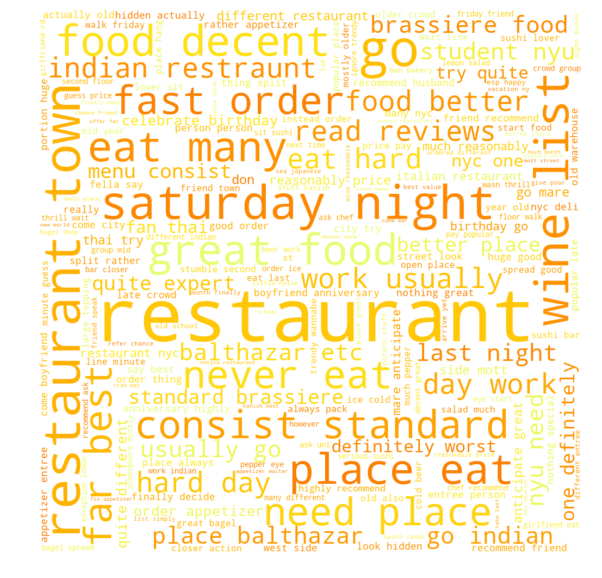

In [46]:
# Polarity == 1 neutral
all_text = ' '.join(word for word in train_s1.lem_words)

wordcloud = WordCloud(width=1000, height=1000, colormap='Wistia', background_color='white', mode='RGBA').generate(all_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

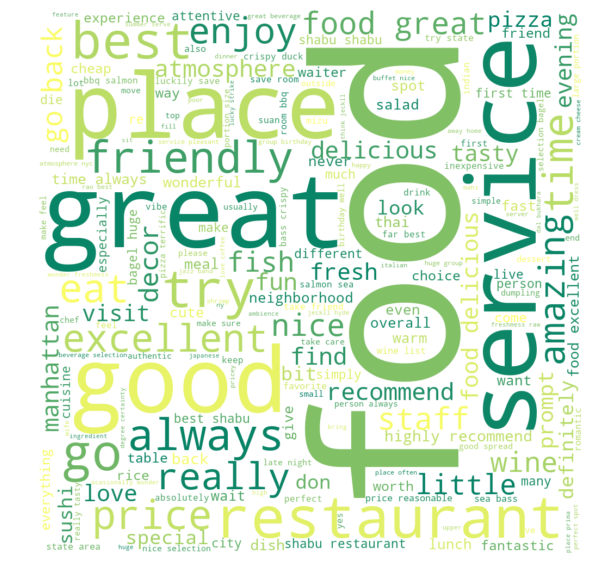

In [49]:
# Polarity == 2 positive
all_text = ' '.join(word for word in train_s2.lem_words)

wordcloud_p2 = WordCloud(width=1000, height=1000, colormap='summer',background_color='white', mode='RGBA').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_p2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Foursquare Cleaning 

In [1]:
import pandas as pd
fs = pd.read_csv('./foursquare/foursquare_csv/londonvenues.csv')
fs.head(3)

,tips,ll
0,Great fun to be had by everyone. The aquarium ...,"51.4409815123,-0.0613689422607"
1,Love this place my new local shop,"51.4669013,0.0528256"
2,Enter our prize draw to win a family ticket to...,"51.501711493,-0.119767368051"


In [2]:
word_tag_fs = cleaning_function(fs.tips)
lemm_fs = separate_word_tag(word_tag_fs)
lemm_fs.head()

NameError: name 'cleaning_function' is not defined

In [60]:
# concat cleaned text with original
df_fs_predict = pd.concat([fs, lemm_fs], axis=1)
df_fs_predict['word_tags'] = word_tag_fs

# separate the long lat
lng=[]
lat=[]
for ll in df_fs_predict['ll']:
    lnglat = ll.split(',')
    lng.append(lnglat[0])
    lat.append(lnglat[1])
df_fs_predict['lng'] =lng
df_fs_predict['lat'] =lat

#  drop the ll column
df_fs_predict = df_fs_predict.drop(['ll'], axis=1)
df_fs_predict.head(3)

,tips,lem_words,lem_tags,word_tags,lng,lat
0,Great fun to be had by everyone. The aquarium ...,great fun be have everyone aquarium be small f...,JJ NN VB VB NN NN VB JJ NN VB NN VB NN NN VB NN,"[great/JJ, fun/NN, be/VB, have/VB, everyone/NN...",51.4409815123,-0.0613689422607
1,Love this place my new local shop,love place new local shop,VB NN JJ JJ NN,"[love/VB, place/NN, new/JJ, local/JJ, shop/NN]",51.4669013,0.0528256
2,Enter our prize draw to win a family ticket to...,prize draw win family ticket sea life don win ...,NN NN VB NN NN NN NN VB VB RB VB RB VB JJ NN V...,"[prize/NN, draw/NN, win/VB, family/NN, ticket/...",51.501711493,-0.119767368051


In [62]:
print df_fs_predict.shape

# save clean foursquare to csv
df_fs_predict.to_csv('./foursquare/foursquare_csv/foursquare_clean.csv', header=True, index=False, encoding='UTF8')

(5176, 6)
